# Improve productivity of business executives

Problem Statement: -50% of total business executives productivity are less than the set target which impact on business performance.



### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


In [2]:
# reading the dataset
df = pd.read_csv("factor analysis v11.csv")

#### Understanding the Dataset

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [3]:
# summary of the dataset: 944 rows, 16 features, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 23 columns):
EMPCODE                             767 non-null int64
EMPNAME                             767 non-null object
Active/Inactive                     767 non-null object
Circle                              767 non-null object
Division                            767 non-null object
Category of Branch                  767 non-null object
Location Change                     767 non-null object
Seating Location                    767 non-null object
Cooling/ Non-Cooling                767 non-null object
% Target Achieved                   767 non-null float64
Tenure in months                    767 non-null int64
Role Change Tenure                  767 non-null int64
Role Change Count                   767 non-null int64
Branches Assigned                   767 non-null int64
Leads assigned                      767 non-null int64
Age                                 767 non-null int64
Salar

In [4]:
# Check first 5 rows of Dataset
df.head()

,EMPCODE,EMPNAME,Active/Inactive,Circle,Division,Category of Branch,Location Change,Seating Location,Cooling/ Non-Cooling,% Target Achieved,...,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
0,23202947,Jegan J,A,Chennai,Trichy,Rural,No,Dindigul,Non-Cooling,0.2,...,3,13,29,330614.0,4,0.66,0.34,6,0.6,92
1,23207679,Sathyan K,A,Chennai,Trichy,Rural,No,Madurai,Non-Cooling,0.4,...,4,12,28,407941.0,5,0.68,0.32,4,0.4,88
2,23212153,Selvaprakash S,A,Chennai,Trichy,Rural,No,Karaikudi,Non-Cooling,0.2,...,2,9,27,344996.0,5,0.59,0.41,7,0.7,104
3,23177485,Ravindra Kumar Srivastava,A,Lucknow,Allahabad,Rural,No,Jounpur,Non-Cooling,0.7,...,5,0,30,364364.0,5,0.01,0.99,9,0.9,134
4,23177496,Abiral Singh,A,Lucknow,Allahabad,Rural,No,Bhadohi,Non-Cooling,0.6,...,1,9,29,318198.0,1,0.00,1.00,9,0.9,117


In [5]:
#Check Statistics of Dataset
df.describe()

,EMPCODE,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
count,7.670000e+02,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.00000,767.000000,767.000000,767.000000
mean,2.365207e+07,0.373142,32.890482,25.466754,0.331160,2.190352,9.946545,29.859192,334641.812007,6.168188,0.349348,0.65073,6.135593,0.613559,107.595828
std,1.199947e+06,0.257693,26.753756,19.571617,0.754348,1.470426,9.029456,4.280137,73226.223588,3.589458,0.276117,0.27615,2.960113,0.296011,37.586536
min,2.307143e+07,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,20.000000,170771.000000,1.000000,0.000000,0.00000,0.000000,0.000000,10.000000
25%,2.318465e+07,0.100000,15.000000,13.000000,0.000000,1.000000,2.000000,27.000000,286506.000000,3.000000,0.100000,0.43000,4.000000,0.400000,84.000000
50%,2.321819e+07,0.400000,25.000000,21.000000,0.000000,2.000000,8.000000,29.000000,329461.000000,6.000000,0.300000,0.70000,7.000000,0.700000,109.000000
75%,2.323724e+07,0.600000,41.000000,36.500000,0.000000,3.000000,15.000000,32.000000,367989.000000,8.000000,0.570000,0.90000,9.000000,0.900000,132.500000
max,2.700382e+07,1.000000,160.000000,160.000000,3.000000,9.000000,63.000000,47.000000,741456.000000,22.000000,1.000000,1.00000,10.000000,1.000000,231.000000


####  Data Cleaning¶


In [6]:
#Change datatype
df['EMPCODE'] = df['EMPCODE'].astype('object')

####  Explorartory Data Analysis on Categorical Variables

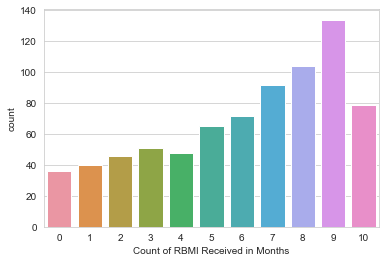

In [7]:
sns.countplot(x = 'Count of RBMI Received in Months', data = df)

In [8]:
# Count of RBMI Achived
df['Count of RBMI Received in Months'].value_counts().T

9     134
8     104
7      92
10     79
6      72
5      65
3      51
4      48
2      46
1      40
0      36
Name: Count of RBMI Received in Months, dtype: int64

In [9]:
round(df.groupby('Cooling/ Non-Cooling').mean()['RBMI% Achived'],2)

Cooling/ Non-Cooling
Non-Cooling    0.61
Name: RBMI% Achived, dtype: float64

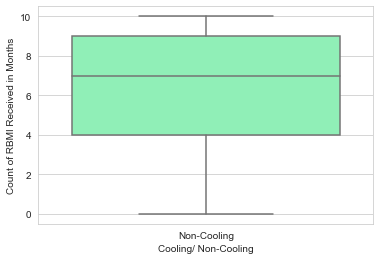

In [10]:
# Create box plot
sns.boxplot(x = 'Cooling/ Non-Cooling', y = 'Count of RBMI Received in Months', data = df, palette = 'rainbow')

In [11]:
round(df.groupby('Circle').mean()['RBMI% Achived'],2)

Circle
Chennai     0.66
Delhi       0.62
Kolkata     0.54
Lucknow     0.58
Thane       0.63
Name: RBMI% Achived, dtype: float64

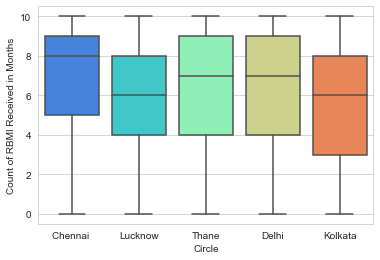

In [12]:
# Create box plot
sns.boxplot(x = 'Circle', y = 'Count of RBMI Received in Months', data = df, palette = 'rainbow')

In [13]:
round(df.groupby('Category of Branch').mean()['RBMI% Achived'],2)

Category of Branch
Large Metro    0.52
Metro          0.61
Rural          0.61
Urban          0.64
Name: RBMI% Achived, dtype: float64

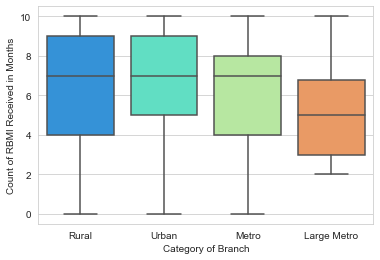

In [14]:
# Create box plot
sns.boxplot(x = 'Category of Branch', y = 'Count of RBMI Received in Months', data = df, palette = 'rainbow')

In [15]:
#Checking counts of object
df['Circle'].value_counts()

Thane       188
Chennai     183
Lucknow     164
Delhi       145
Kolkata      87
Name: Circle, dtype: int64

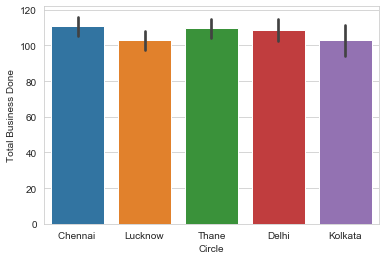

In [16]:
#Create Barplot
sns.barplot(x='Circle',y='Total Business Done',data=df)

In [17]:
# Agreegate response against the object
(df.groupby('Circle').mean()['Total Business Done'])

Circle
Chennai     110.683060
Delhi       108.862069
Kolkata     103.068966
Lucknow     103.036585
Thane       109.686170
Name: Total Business Done, dtype: float64

In [18]:
#Checking counts of object
round(df.groupby('Circle').mean(),2)

,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
Circle,,,,,,,,,,,,,,
Chennai,0.40,33.77,26.98,0.32,2.27,8.87,29.77,346893.54,5.97,0.38,0.62,6.58,0.66,110.68
Delhi,0.37,35.79,28.66,0.33,1.77,10.01,30.39,341675.64,5.12,0.34,0.66,6.17,0.62,108.86
Kolkata,0.31,28.97,21.49,0.34,3.01,10.14,29.84,313273.26,5.79,0.34,0.66,5.39,0.54,103.07
Lucknow,0.35,30.40,24.26,0.24,1.95,8.15,29.78,324628.88,5.10,0.29,0.71,5.78,0.58,103.04
Thane,0.39,33.79,24.43,0.42,2.27,12.41,29.62,335914.22,8.28,0.38,0.62,6.33,0.63,109.69


In [19]:
#Checking counts of object
round(df.groupby('Cooling/ Non-Cooling').mean(),2)

,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
Cooling/ Non-Cooling,,,,,,,,,,,,,,
Non-Cooling,0.37,32.89,25.47,0.33,2.19,9.95,29.86,334641.81,6.17,0.35,0.65,6.14,0.61,107.6


In [20]:
round(df.groupby('Category of Branch').mean(),2)

,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
Category of Branch,,,,,,,,,,,,,,
Large Metro,0.29,33.50,27.00,0.33,2.61,11.89,30.67,361606.11,6.94,0.35,0.65,5.22,0.52,98.00
Metro,0.37,27.07,22.91,0.32,2.84,9.23,30.14,338136.38,8.30,0.53,0.47,6.14,0.61,104.02
Rural,0.37,34.07,25.90,0.35,2.14,10.35,29.78,332059.07,5.81,0.30,0.70,6.11,0.61,107.33
Urban,0.39,29.50,24.23,0.22,2.07,7.83,30.03,342175.68,6.83,0.51,0.49,6.40,0.64,112.46


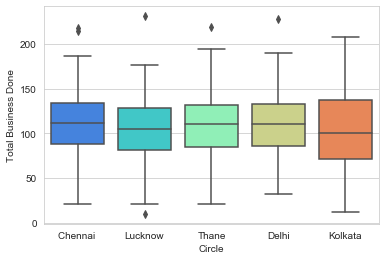

In [21]:
# Create box plot
sns.boxplot(x = 'Circle', y = 'Total Business Done', data = df, palette = 'rainbow')

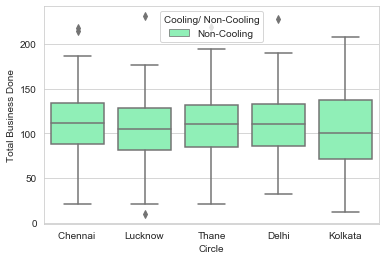

In [22]:
# Create box plot
sns.boxplot(x = 'Circle', y = 'Total Business Done', data = df, palette = 'rainbow',hue ='Cooling/ Non-Cooling')

In [23]:
#Checking counts of object
df['Cooling/ Non-Cooling'].value_counts()

Non-Cooling    767
Name: Cooling/ Non-Cooling, dtype: int64

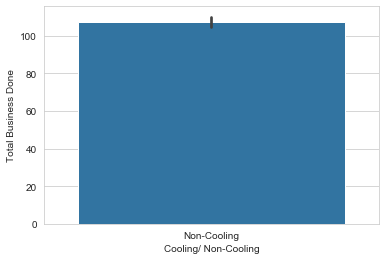

In [24]:
sns.barplot(x='Cooling/ Non-Cooling',y='Total Business Done',data=df)

In [25]:
df.groupby('Cooling/ Non-Cooling').mean()['Total Business Done']

Cooling/ Non-Cooling
Non-Cooling    107.595828
Name: Total Business Done, dtype: float64

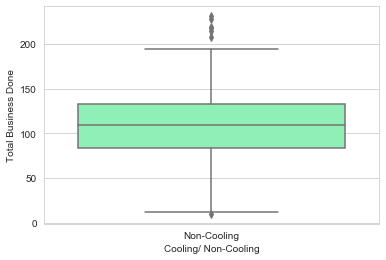

In [26]:
sns.boxplot(x = 'Cooling/ Non-Cooling', y = 'Total Business Done', data = df, palette = 'rainbow')

In [27]:
df

,EMPCODE,EMPNAME,Active/Inactive,Circle,Division,Category of Branch,Location Change,Seating Location,Cooling/ Non-Cooling,% Target Achieved,...,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
0,23202947,Jegan J,A,Chennai,Trichy,Rural,No,Dindigul,Non-Cooling,0.2,...,3,13,29,330614.0,4,0.66,0.34,6,0.6,92
1,23207679,Sathyan K,A,Chennai,Trichy,Rural,No,Madurai,Non-Cooling,0.4,...,4,12,28,407941.0,5,0.68,0.32,4,0.4,88
2,23212153,Selvaprakash S,A,Chennai,Trichy,Rural,No,Karaikudi,Non-Cooling,0.2,...,2,9,27,344996.0,5,0.59,0.41,7,0.7,104
3,23177485,Ravindra Kumar Srivastava,A,Lucknow,Allahabad,Rural,No,Jounpur,Non-Cooling,0.7,...,5,0,30,364364.0,5,0.01,0.99,9,0.9,134
4,23177496,Abiral Singh,A,Lucknow,Allahabad,Rural,No,Bhadohi,Non-Cooling,0.6,...,1,9,29,318198.0,1,0.00,1.00,9,0.9,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,27002773,Anupal Gogoi,A,Kolkata,Guwahati,Rural,No,Sivasagar,Non-Cooling,0.0,...,1,1,32,286491.0,1,0.00,1.00,0,0.0,18
763,23179495,Arjun Sawant,A,Thane,Thane,Rural,No,Jalna,Non-Cooling,0.6,...,1,12,29,390631.0,6,0.08,0.92,7,0.7,127
764,23187476,Prasad Kulkarni,A,Thane,Thane,Rural,No,Parbhani,Non-Cooling,0.4,...,1,11,26,316254.0,5,0.05,0.95,8,0.8,114
765,23224493,Yogeshwar Dabhade,A,Thane,Thane,Rural,No,Aurangabad,Non-Cooling,0.2,...,2,23,28,329461.0,15,0.41,0.59,5,0.5,97


In [28]:
df['Role Change Tenure'].value_counts()[0]

11

In [29]:
#Checking counts of object
df['Category of Branch'].value_counts()


Rural          583
Urban          109
Metro           57
Large Metro     18
Name: Category of Branch, dtype: int64

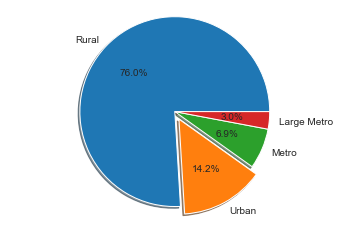

In [30]:
#Draw Pie Chart
branch_category = [717,134,65,28] 
branch_category_name = ['Rural','Urban','Metro','Large Metro']
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'] 
plt.pie(branch_category,labels=branch_category_name,shadow=True,autopct='%1.1f%%',radius=1.1,explode=[0,0.1,0,0]) 
plt.axis('equal') 
plt.show()

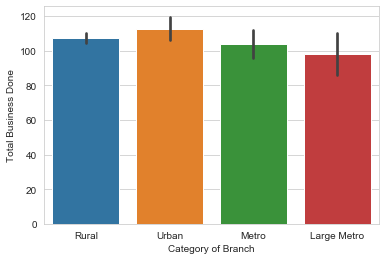

In [31]:
sns.barplot(x='Category of Branch',y='Total Business Done',data=df)

In [32]:
df.groupby('Category of Branch').mean()['Total Business Done']

Category of Branch
Large Metro     98.000000
Metro          104.017544
Rural          107.332762
Urban          112.458716
Name: Total Business Done, dtype: float64

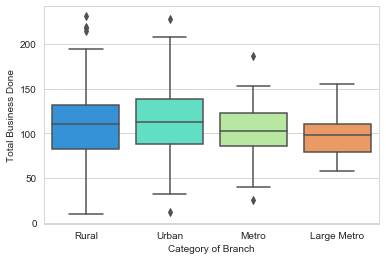

In [33]:
# Create box plot
sns.boxplot(x = 'Category of Branch', y = 'Total Business Done', data = df, palette = 'rainbow')

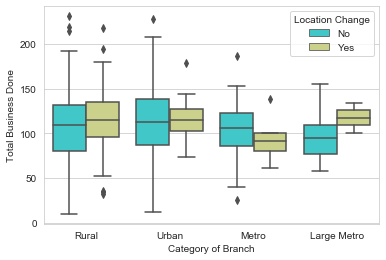

In [34]:
# Create box plot
sns.boxplot(x = 'Category of Branch', y = 'Total Business Done', data = df, palette = 'rainbow',hue = 'Location Change')

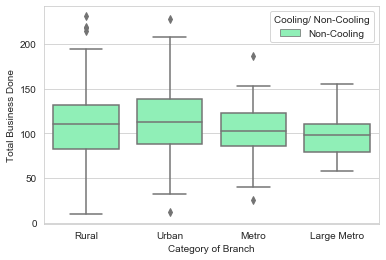

In [35]:
# Create box plot
sns.boxplot(x = 'Category of Branch', y = 'Total Business Done', data = df, palette = 'rainbow',hue = 'Cooling/ Non-Cooling')

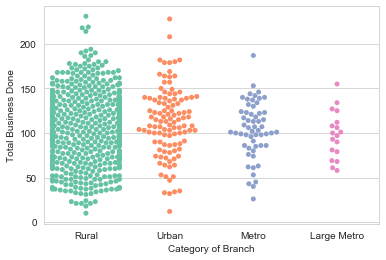

In [36]:
# Create swarm plot
sns.swarmplot(x = 'Category of Branch', y = 'Total Business Done', data = df, palette = 'Set2')

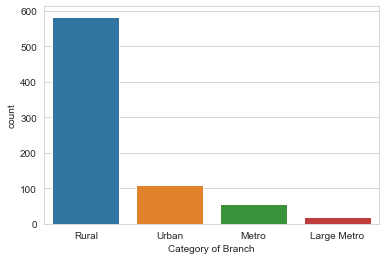

In [37]:
sns.countplot(x = 'Category of Branch', data = df)

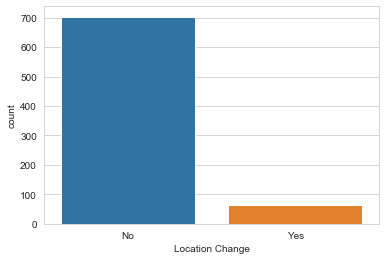

In [38]:
sns.countplot(x = 'Location Change', data = df)

In [39]:
df['Location Change'].value_counts()

No     703
Yes     64
Name: Location Change, dtype: int64

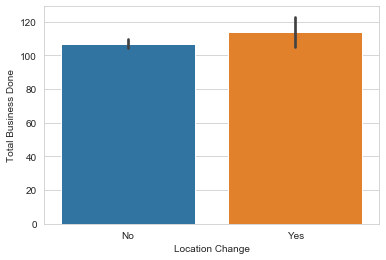

In [40]:
sns.barplot(x='Location Change',y='Total Business Done',data=df)

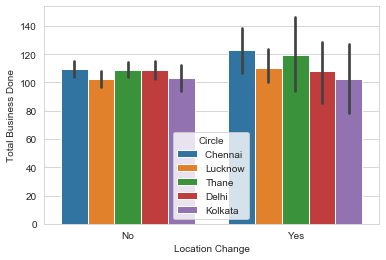

In [41]:
sns.barplot(x='Location Change',y='Total Business Done',data=df, hue = 'Circle')

In [42]:
df.head()

,EMPCODE,EMPNAME,Active/Inactive,Circle,Division,Category of Branch,Location Change,Seating Location,Cooling/ Non-Cooling,% Target Achieved,...,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
0,23202947,Jegan J,A,Chennai,Trichy,Rural,No,Dindigul,Non-Cooling,0.2,...,3,13,29,330614.0,4,0.66,0.34,6,0.6,92
1,23207679,Sathyan K,A,Chennai,Trichy,Rural,No,Madurai,Non-Cooling,0.4,...,4,12,28,407941.0,5,0.68,0.32,4,0.4,88
2,23212153,Selvaprakash S,A,Chennai,Trichy,Rural,No,Karaikudi,Non-Cooling,0.2,...,2,9,27,344996.0,5,0.59,0.41,7,0.7,104
3,23177485,Ravindra Kumar Srivastava,A,Lucknow,Allahabad,Rural,No,Jounpur,Non-Cooling,0.7,...,5,0,30,364364.0,5,0.01,0.99,9,0.9,134
4,23177496,Abiral Singh,A,Lucknow,Allahabad,Rural,No,Bhadohi,Non-Cooling,0.6,...,1,9,29,318198.0,1,0.00,1.00,9,0.9,117


In [43]:
df['Role Change Tenure'].value_counts()

39     46
7      35
20     34
6      31
11     26
       ..
69      1
68      1
67      1
58      1
160     1
Name: Role Change Tenure, Length: 77, dtype: int64

In [44]:
#df['Target Achieved'].value_counts()

In [45]:
#sns.countplot(x = 'Target Achieved', data = df)

In [46]:
#sns.countplot(x = 'Target Achieved', data = df,hue ='Cooling/ Non-Cooling')

### Create function and apply it on dataframe 

#def status(tenure):
    #if tenure>3:
        #return 'Non cooling'
    #else:
        #return 'Cooling'

#df['cstatus'] = df['Tenure in months'].apply(lambda x:status(x))
 

### Exploratory data analysis on Numerical data

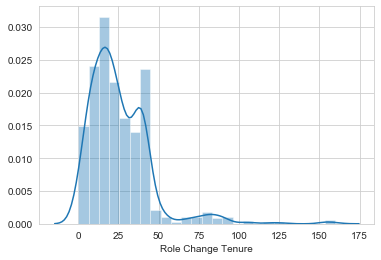

In [47]:
# Role Change Histogram
sns.distplot(df['Role Change Tenure'],bins=25)

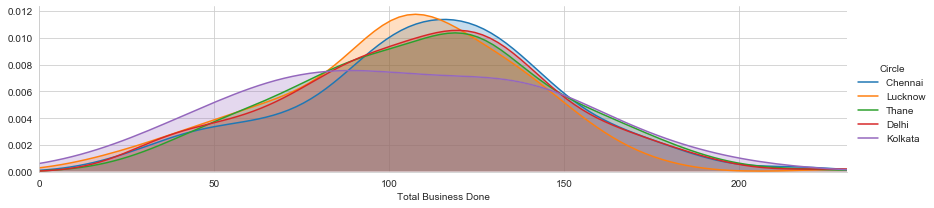

In [48]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(df, hue="Circle",aspect=4)
fig.map(sns.kdeplot,'Total Business Done',shade= True)
oldest = df['Total Business Done'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

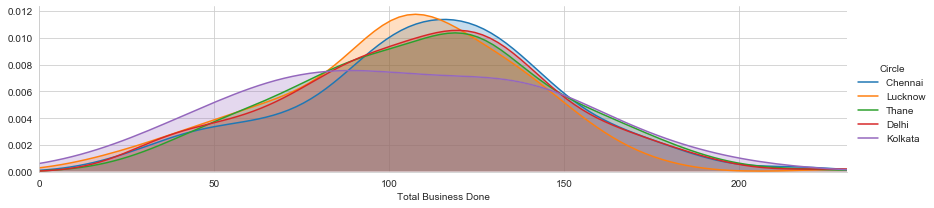

In [49]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(df, hue="Circle",aspect=4)
fig.map(sns.kdeplot,'Total Business Done',shade= True)
oldest = df['Total Business Done'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


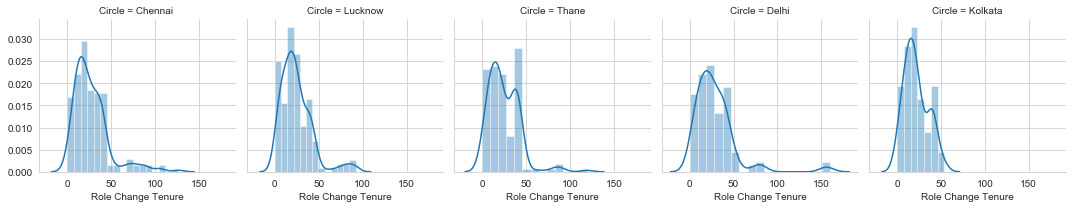

In [50]:
#Draw distplot
t = sns.FacetGrid(data = df, col = 'Circle')
t.map(sns.distplot, 'Role Change Tenure')


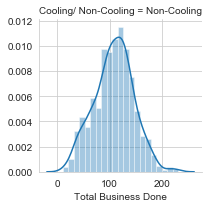

In [51]:
#Draw distplot
t = sns.FacetGrid(data = df, col = 'Cooling/ Non-Cooling')
t.map(sns.distplot, 'Total Business Done')

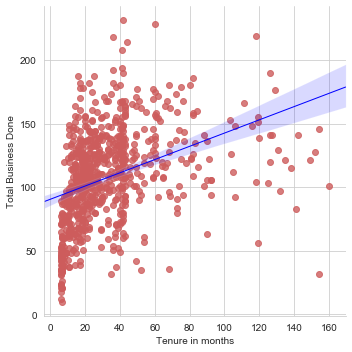

In [52]:
#Linear regression
sns.lmplot(x='Tenure in months',y='Total Business Done',data=df,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})


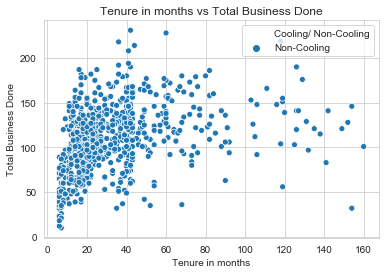

In [53]:
sns.scatterplot(x=df['Tenure in months'],y =df['Total Business Done'],hue =df['Cooling/ Non-Cooling'])
plt.title('Tenure in months vs Total Business Done')
plt.xlabel('Tenure in months')
plt.ylabel('Total Business Done')
plt.legend(loc ='upper right')
plt.show()

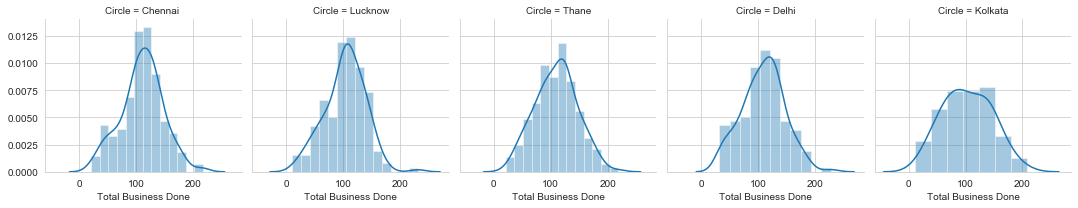

In [54]:
t = sns.FacetGrid(data = df, col = 'Circle')
t.map(sns.distplot, 'Total Business Done')

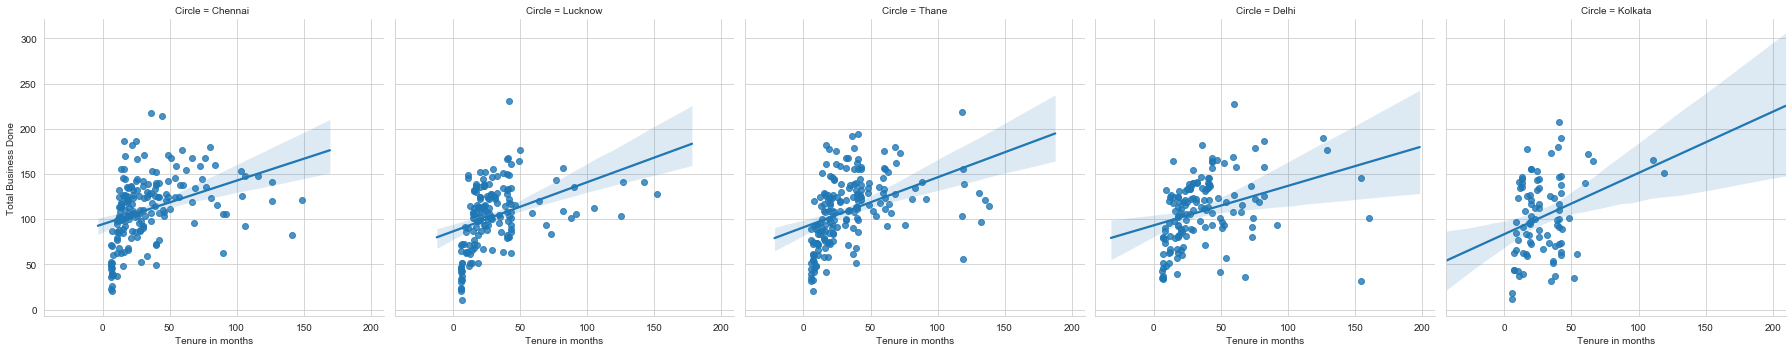

In [55]:
sns.lmplot(x='Tenure in months',y='Total Business Done',data=df,col='Circle')

In [56]:
# Let's do the same for class by changing the hue argument:
#fig = sns.FacetGrid(df, hue="Category of Branch",aspect=4)
#fig.map(sns.kdeplot,'Total Business Done',shade= True)
#oldest = df['Total Business Done'].max()
#fig.set(xlim=(0,oldest))
#fig.add_legend()

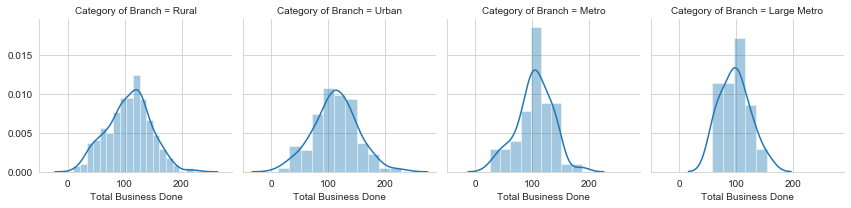

In [57]:
h = sns.FacetGrid(data = df, col = 'Category of Branch')
h.map(sns.distplot, 'Total Business Done')

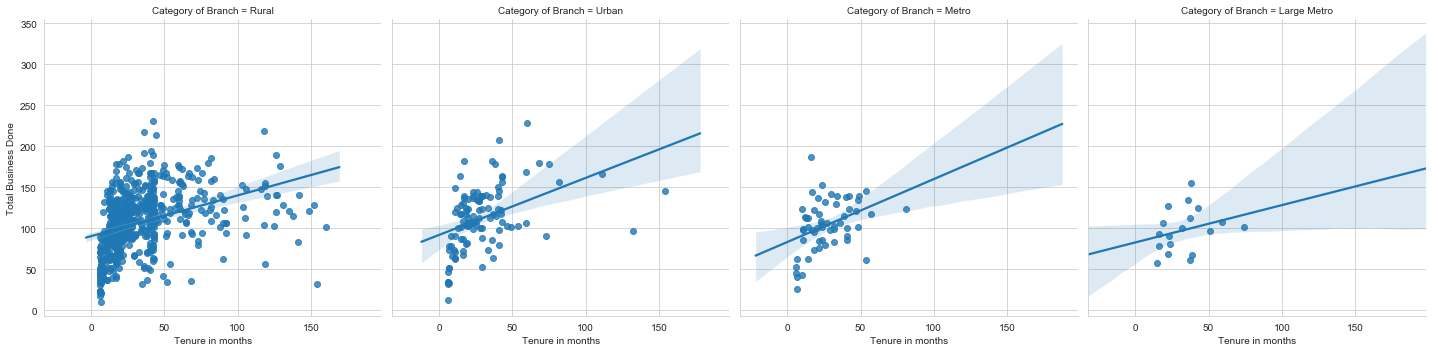

In [58]:
sns.lmplot(x='Tenure in months',y='Total Business Done',data=df,col='Category of Branch')

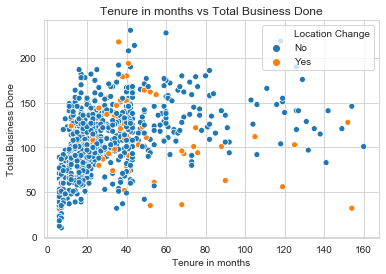

In [59]:
#Location change

sns.scatterplot(x=df['Tenure in months'],y =df['Total Business Done'],hue =df['Location Change'])
plt.title('Tenure in months vs Total Business Done')
plt.xlabel('Tenure in months')
plt.ylabel('Total Business Done')
plt.legend(loc ='upper right')
plt.show()

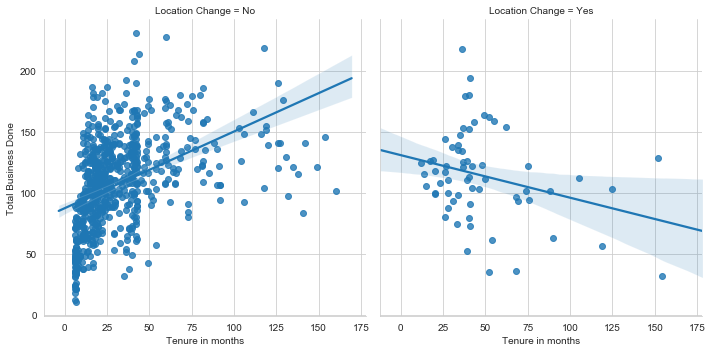

In [60]:
sns.lmplot(x='Tenure in months',y='Total Business Done',data=df,col='Location Change')

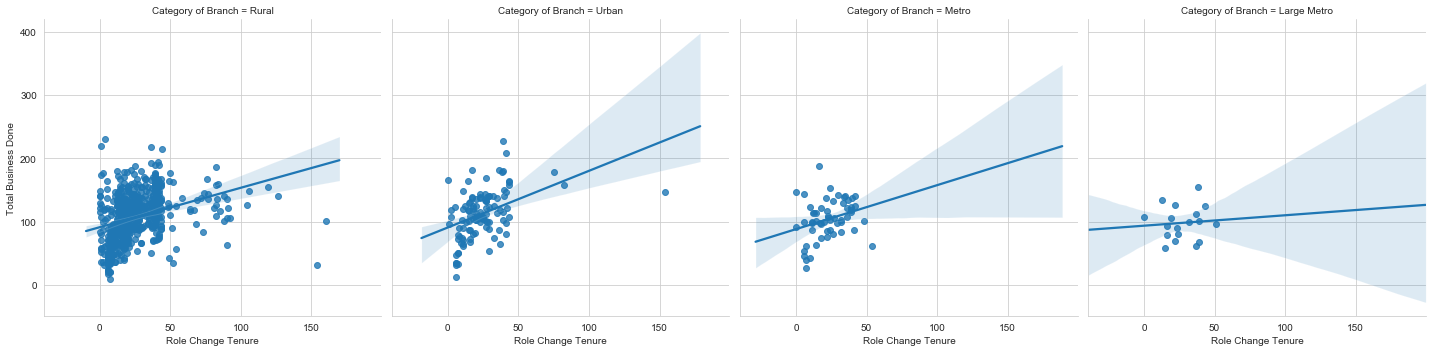

In [61]:
sns.lmplot(x='Role Change Tenure',y='Total Business Done',data=df,col='Category of Branch')

In [62]:
# Regression 
#sns.pairplot(df, x_vars=['Salary','Dealers Handled','Rle Change Tenure'], y_vars='Total Business Done',size=7, aspect=0.5, kind='scatter')


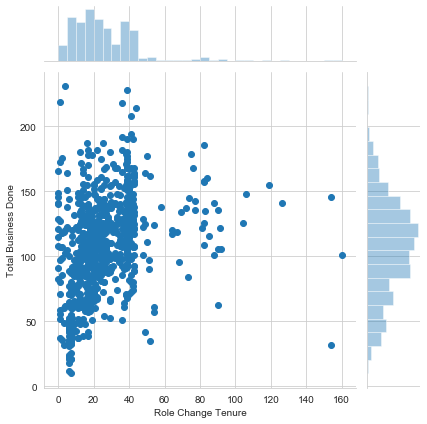

In [63]:
# Create joint distribution plot
sns.jointplot(x = 'Role Change Tenure', y = 'Total Business Done', data = df)

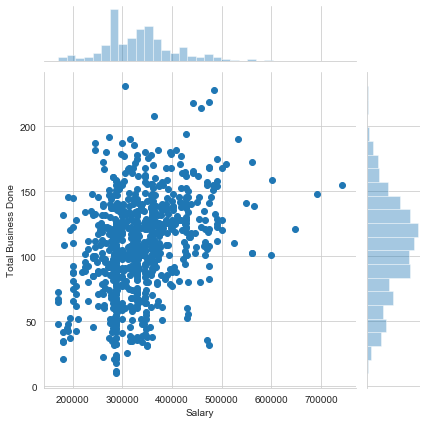

In [64]:
# Create joint distribution plot
sns.jointplot(x = 'Salary', y = 'Total Business Done', data = df)

In [65]:
# paiwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(df)
#plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [66]:
# correlation matrix
cor = df.corr()
cor

,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
% Target Achieved,1.000000,0.332786,0.311733,0.177444,-0.022321,0.258422,0.153633,0.325319,0.245105,0.116774,-0.116712,0.871622,0.871622,0.878272
Tenure in months,0.332786,1.000000,0.605700,0.552865,0.045397,0.107296,0.481622,0.576862,0.048343,-0.017518,0.017610,0.340628,0.340628,0.370418
Role Change Tenure,0.311733,0.605700,1.000000,-0.108723,0.002171,0.127786,0.310227,0.334485,0.058161,-0.016450,0.016512,0.333534,0.333534,0.339651
Role Change Count,0.177444,0.552865,-0.108723,1.000000,0.018420,0.049176,0.258680,0.371802,0.037742,0.007556,-0.007554,0.159350,0.159350,0.188762
Branches Assigned,-0.022321,0.045397,0.002171,0.018420,1.000000,0.105484,-0.007767,-0.013037,0.132191,0.111495,-0.111550,0.025255,0.025255,0.041644
Leads assigned,0.258422,0.107296,0.127786,0.049176,0.105484,1.000000,0.017843,0.075415,0.030165,-0.311008,0.311025,0.259041,0.259041,0.291482
Age,0.153633,0.481622,0.310227,0.258680,-0.007767,0.017843,1.000000,0.489549,0.018368,0.000276,-0.000299,0.178016,0.178016,0.176834
Salary,0.325319,0.576862,0.334485,0.371802,-0.013037,0.075415,0.489549,1.000000,0.135288,0.061395,-0.061266,0.329568,0.329568,0.353401
Dealers Handled,0.245105,0.048343,0.058161,0.037742,0.132191,0.030165,0.018368,0.135288,1.000000,0.579768,-0.579791,0.278355,0.278355,0.303286
Business through dealer,0.116774,-0.017518,-0.016450,0.007556,0.111495,-0.311008,0.000276,0.061395,0.579768,1.000000,-0.999995,0.131849,0.131849,0.158916


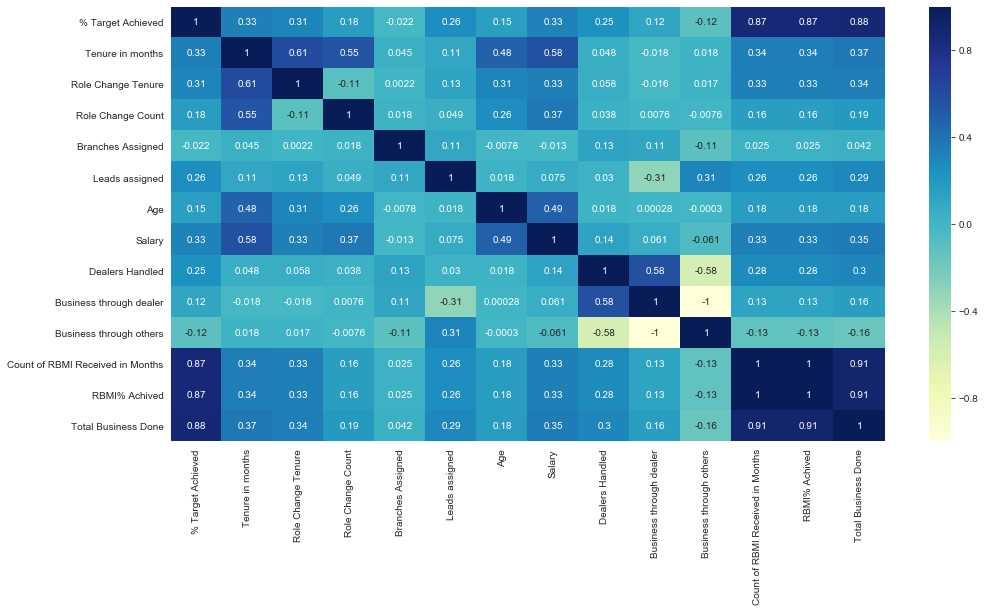

In [67]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### Handle Categorical data



In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 23 columns):
EMPCODE                             767 non-null object
EMPNAME                             767 non-null object
Active/Inactive                     767 non-null object
Circle                              767 non-null object
Division                            767 non-null object
Category of Branch                  767 non-null object
Location Change                     767 non-null object
Seating Location                    767 non-null object
Cooling/ Non-Cooling                767 non-null object
% Target Achieved                   767 non-null float64
Tenure in months                    767 non-null int64
Role Change Tenure                  767 non-null int64
Role Change Count                   767 non-null int64
Branches Assigned                   767 non-null int64
Leads assigned                      767 non-null int64
Age                                 767 non-null int64
Sala

In [69]:
df.tail()

,EMPCODE,EMPNAME,Active/Inactive,Circle,Division,Category of Branch,Location Change,Seating Location,Cooling/ Non-Cooling,% Target Achieved,...,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,Count of RBMI Received in Months,RBMI% Achived,Total Business Done
762,27002773,Anupal Gogoi,A,Kolkata,Guwahati,Rural,No,Sivasagar,Non-Cooling,0.0,...,1,1,32,286491.0,1,0.00,1.00,0,0.0,18
763,23179495,Arjun Sawant,A,Thane,Thane,Rural,No,Jalna,Non-Cooling,0.6,...,1,12,29,390631.0,6,0.08,0.92,7,0.7,127
764,23187476,Prasad Kulkarni,A,Thane,Thane,Rural,No,Parbhani,Non-Cooling,0.4,...,1,11,26,316254.0,5,0.05,0.95,8,0.8,114
765,23224493,Yogeshwar Dabhade,A,Thane,Thane,Rural,No,Aurangabad,Non-Cooling,0.2,...,2,23,28,329461.0,15,0.41,0.59,5,0.5,97
766,27000113,Pawan Wade,A,Thane,Thane,Rural,No,Sillod,Non-Cooling,0.0,...,1,4,30,286487.0,7,0.25,0.75,0,0.0,48


In [70]:
df['Cooling/ Non-Cooling']

0      Non-Cooling
1      Non-Cooling
2      Non-Cooling
3      Non-Cooling
4      Non-Cooling
          ...     
762    Non-Cooling
763    Non-Cooling
764    Non-Cooling
765    Non-Cooling
766    Non-Cooling
Name: Cooling/ Non-Cooling, Length: 767, dtype: object

In [71]:
#df['Cooling/ Non-Cooling']= df['Cooling/ Non-Cooling'].map({'Cooling':0,'Non-Cooling':1})

In [72]:
df.drop(['Cooling/ Non-Cooling'],axis=1,inplace =True)

In [73]:
#df['Cooling/ Non-Cooling']

In [74]:
df['Location Change']= df['Location Change'].map({'No':0,'Yes':1})

In [75]:
df['Location Change']

0      0
1      0
2      0
3      0
4      0
      ..
762    0
763    0
764    0
765    0
766    0
Name: Location Change, Length: 767, dtype: int64

In [76]:
df['Location Change'].value_counts()

0    703
1     64
Name: Location Change, dtype: int64

In [77]:
#df['Target Achieved']= df['Target Achieved'].map({'N':0,'Y':1})

In [78]:
#df['Target Achieved'].value_counts()

In [79]:
# Creating a dummy variable for 'furnishingstatus'
dummy = pd.get_dummies(df['Category of Branch'])

In [80]:
# we don't need 4 columns.
# we can use drop_first = True to drop the first column from status df.
dummy = pd.get_dummies(df['Category of Branch'],drop_first=True)

In [81]:
#Adding the results to the master dataframe
df = pd.concat([df,dummy],axis=1)

In [82]:
df.drop(['EMPCODE'],axis =1,inplace =True)

In [83]:
df.drop(['Count of RBMI Received in Months'],axis =1,inplace =True)

In [84]:
df.drop(['Category of Branch'],axis=1,inplace =True)

In [85]:
#df.drop(['EMPCODE'],axis=1,inplace =True)

In [86]:
df.drop(['EMPNAME'],axis=1,inplace =True)

In [87]:
df.drop(['Active/Inactive'],axis=1,inplace =True)

In [88]:
df.drop(['Circle'],axis=1,inplace =True)

In [89]:
df.drop(['Division'],axis=1,inplace =True)

In [90]:
df.drop(['Seating Location'],axis=1,inplace =True)

In [123]:
df['Location Change'].value_counts()

0.0    703
1.0     64
Name: Location Change, dtype: int64

In [126]:
df['Location Change']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
762    0.0
763    0.0
764    0.0
765    0.0
766    0.0
Name: Location Change, Length: 767, dtype: float64

In [125]:
df.head()

,Location Change,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,RBMI% Achived,Total Business Done,Metro,Rural,Urban
0,0.0,0.2,0.155844,0.18750,0.0,0.333333,0.206349,0.333333,0.280090,0.142857,0.66,0.34,0.6,0.371041,0.0,1.0,0.0
1,0.0,0.4,0.142857,0.17500,0.0,0.444444,0.190476,0.296296,0.415588,0.190476,0.68,0.32,0.4,0.352941,0.0,1.0,0.0
2,0.0,0.2,0.129870,0.16250,0.0,0.222222,0.142857,0.259259,0.305291,0.190476,0.59,0.41,0.7,0.425339,0.0,1.0,0.0
3,0.0,0.7,0.240260,0.26875,0.0,0.555556,0.000000,0.370370,0.339229,0.190476,0.01,0.99,0.9,0.561086,0.0,1.0,0.0
4,0.0,0.6,0.240260,0.26875,0.0,0.111111,0.142857,0.333333,0.258333,0.000000,0.00,1.00,0.9,0.484163,0.0,1.0,0.0


##Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. There are twocoon ways of rescaling

    Normalisation (min-max scaling) and
    standardisation (mean-o, sigma-1) Let's try normalisation



In [92]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
#applying normalize ( ) to all columns 
df =df.apply(normalize)

### Splitting Data into Training and Testing Sets

In [93]:
df

,Location Change,% Target Achieved,Tenure in months,Role Change Tenure,Role Change Count,Branches Assigned,Leads assigned,Age,Salary,Dealers Handled,Business through dealer,Business through others,RBMI% Achived,Total Business Done,Metro,Rural,Urban
0,0.0,0.2,0.155844,0.18750,0.0,0.333333,0.206349,0.333333,0.280090,0.142857,0.66,0.34,0.6,0.371041,0.0,1.0,0.0
1,0.0,0.4,0.142857,0.17500,0.0,0.444444,0.190476,0.296296,0.415588,0.190476,0.68,0.32,0.4,0.352941,0.0,1.0,0.0
2,0.0,0.2,0.129870,0.16250,0.0,0.222222,0.142857,0.259259,0.305291,0.190476,0.59,0.41,0.7,0.425339,0.0,1.0,0.0
3,0.0,0.7,0.240260,0.26875,0.0,0.555556,0.000000,0.370370,0.339229,0.190476,0.01,0.99,0.9,0.561086,0.0,1.0,0.0
4,0.0,0.6,0.240260,0.26875,0.0,0.111111,0.142857,0.333333,0.258333,0.000000,0.00,1.00,0.9,0.484163,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.0,0.0,0.000000,0.03750,0.0,0.111111,0.015873,0.444444,0.202774,0.000000,0.00,1.00,0.0,0.036199,0.0,1.0,0.0
763,0.0,0.6,0.233766,0.26250,0.0,0.111111,0.190476,0.333333,0.385256,0.238095,0.08,0.92,0.7,0.529412,0.0,1.0,0.0
764,0.0,0.4,0.214286,0.24375,0.0,0.111111,0.174603,0.222222,0.254927,0.190476,0.05,0.95,0.8,0.470588,0.0,1.0,0.0
765,0.0,0.2,0.090909,0.12500,0.0,0.222222,0.365079,0.296296,0.278069,0.666667,0.41,0.59,0.5,0.393665,0.0,1.0,0.0


In [94]:
df.columns

Index(['Location Change', '% Target Achieved', 'Tenure in months',
       'Role Change Tenure', 'Role Change Count', 'Branches Assigned',
       'Leads assigned', 'Age', 'Salary', 'Dealers Handled',
       'Business through dealer', 'Business through others', 'RBMI% Achived',
       'Total Business Done', 'Metro', 'Rural', 'Urban'],
      dtype='object')

In [95]:
# Putting feature variable to X
X = df[['Location Change','Tenure in months',
       'Role Change Tenure', 'Role Change Count', 'Branches Assigned',
       'Leads assigned', 'Age', 'Salary', 'Dealers Handled',
       'Business through dealer', 'Business through others','Metro', 'Rural', 'Urban','RBMI% Achived']]

# Putting response variable to y
y = df['Total Business Done']

In [96]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [97]:
import statsmodels.api as sm          # Importing statsmodels
X_train_lm = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

### K-Fold Validation

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81861013, 0.8292798 , 0.77629196, 0.78851091, 0.79360452])

In [99]:
print(lm_1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total Business Done   R-squared (uncentered):                   0.979
Model:                             OLS   Adj. R-squared (uncentered):              0.979
Method:                  Least Squares   F-statistic:                              1643.
Date:                 Thu, 26 Mar 2020   Prob (F-statistic):                        0.00
Time:                         21:07:58   Log-Likelihood:                          683.99
No. Observations:                  536   AIC:                                     -1338.
Df Residuals:                      521   BIC:                                     -1274.
Df Model:                           15                                                  
Covariance Type:             nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Random Forest Regression 

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [101]:
rf = RandomForestRegressor(n_estimators=500,max_depth =5)
rf.fit(X_train, y_train)
y_pred_rf =rf.predict(X_test)
print(r2_score(y_pred_rf,y_test))

0.814584620148798


### RFE (Recurssive Feature Extraction)

In [102]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [103]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 5)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False False False False False  True False  True False  True  True False
 False False  True]
[10  5  2  4  9  1  6  1 11  1  1  3  8  7  1]


In [104]:
col = X_train.columns[rfe.support_]

In [105]:
col

Index(['Leads assigned', 'Salary', 'Business through dealer',
       'Business through others', 'RBMI% Achived'],
      dtype='object')

### Building model using sklearn

In [106]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [107]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [108]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [109]:
#Let's see the summary of our linear model
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Total Business Done   R-squared:                       0.841
Model:                             OLS   Adj. R-squared:                  0.839
Method:                  Least Squares   F-statistic:                     559.9
Date:                 Thu, 26 Mar 2020   Prob (F-statistic):          8.09e-209
Time:                         21:08:03   Log-Likelihood:                 677.33
No. Observations:                  536   AIC:                            -1343.
Df Residuals:                      530   BIC:                            -1317.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

### Making Prediction

In [110]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

In [111]:
X_test_rfe.shape

(231, 6)

Text(0, 0.5, 'y_pred')

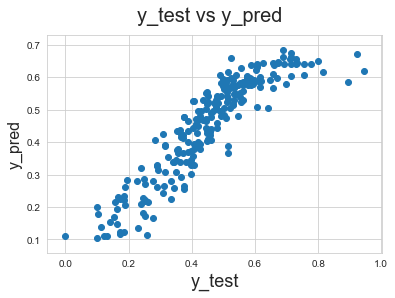

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [113]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.07037787178728329


In [114]:
df1 =pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [115]:
round(df1,2)*100

,predictions,actual
173,39.0,32.0
253,44.0,45.0
207,15.0,16.0
433,32.0,24.0
191,59.0,60.0
...,...,...
259,34.0,34.0
511,52.0,53.0
111,50.0,44.0
547,54.0,51.0


## Ridge Regression

In [116]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [117]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041419,0.070845,0.003198,7.540231e-04,0.0001,{'alpha': 0.0001},-0.050153,-0.056924,-0.054193,-0.055916,...,-0.054767,0.002495,20,-0.053552,-0.051925,-0.051817,-0.050707,-0.051649,-0.051930,0.000919
1,0.004801,0.001166,0.002201,4.000905e-04,0.001,{'alpha': 0.001},-0.050102,-0.056928,-0.053774,-0.055804,...,-0.054653,0.002530,19,-0.053569,-0.051910,-0.051873,-0.050713,-0.051642,-0.051941,0.000922
2,0.004202,0.000400,0.001601,4.902908e-04,0.01,{'alpha': 0.01},-0.050066,-0.056929,-0.053667,-0.055770,...,-0.054617,0.002547,18,-0.053572,-0.051900,-0.051883,-0.050713,-0.051637,-0.051941,0.000924
3,0.004402,0.001020,0.002401,4.907190e-04,0.05,{'alpha': 0.05},-0.049972,-0.056928,-0.053629,-0.055752,...,-0.054581,0.002577,17,-0.053562,-0.051877,-0.051868,-0.050702,-0.051622,-0.051926,0.000924
4,0.004002,0.000633,0.002001,4.909339e-07,0.1,{'alpha': 0.1},-0.049859,-0.056926,-0.053594,-0.055733,...,-0.054539,0.002611,16,-0.053550,-0.051851,-0.051849,-0.050689,-0.051603,-0.051908,0.000926


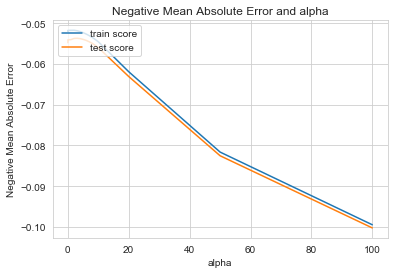

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [119]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00082598,  0.04109402,  0.03807344,  0.01936305, -0.00136596,
        0.06773305,  0.01159477,  0.03663395,  0.03135675,  0.01963086,
       -0.01959039, -0.01454714,  0.0093065 ,  0.01979468,  0.366985  ])

In [120]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.801259,{'normalize': True}
1,lasso,-0.023256,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.669755,"{'criterion': 'mse', 'splitter': 'random'}"
